# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
### Import all packages

import pickle
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import random
import csv
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from PIL import Image
import matplotlib.image as mpimg
import skimage.transform as imgtf

# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
### Load pickled data

training_file   = 'X:\\Basti\\Udacity\\SelfDrivingCar\\projects\\CarND-Traffic-Sign-Classifier-Project\\data\\train.p'
validation_file = 'X:\\Basti\\Udacity\\SelfDrivingCar\\projects\\CarND-Traffic-Sign-Classifier-Project\\data\\valid.p'
testing_file    = 'X:\\Basti\\Udacity\\SelfDrivingCar\\projects\\CarND-Traffic-Sign-Classifier-Project\\data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test,  y_test  = test ['features'], test ['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Basic summary of training set

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
unique_classes, class_counts = np.unique(y_train, return_counts=True)
n_classes = len(unique_classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

[ 9960  9961  9962 ..., 63716 63717 63718]
Class value of image = 0 : Speed limit (20km/h)
[ 2220  2221  2222 ..., 45596 45597 45598]
Class value of image = 1 : Speed limit (30km/h)
[ 31439  31440  31441 ..., 112913 112914 112915]
Class value of image = 2 : Speed limit (50km/h)
[ 5370  5371  5372 ..., 54686 54687 54688]
Class value of image = 3 : Speed limit (60km/h)
[ 6810  6811  6812 ..., 58076 58077 58078]
Class value of image = 4 : Speed limit (70km/h)
[12360 12361 12362 ..., 74726 74727 74728]
Class value of image = 5 : Speed limit (80km/h)
[21450 21451 21452 ..., 88826 88827 88828]
Class value of image = 6 : End of speed limit (80km/h)
[23730 23731 23732 ..., 93326 93327 93328]
Class value of image = 7 : Speed limit (100km/h)
[15870 15871 15872 ..., 79106 79107 79108]
Class value of image = 8 : Speed limit (120km/h)
[11040 11041 11042 ..., 73076 73077 73078]
Class value of image = 9 : No passing
[17130 17131 17132 ..., 80906 80907 80908]
Class value of image = 10 : No passing for

X:\Applications\Miniconda3\envs\carnd-term1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 Dangerous curve to the left
[25950 25951 25952 ..., 99626 99627 99628]
Class value of image = 20 : Dangerous curve to the right
[25680 25681 25682 ..., 98126 98127 98128]
Class value of image = 21 : Double curve
[ 4500  4501  4502 ..., 48746 48747 48748]
Class value of image = 22 : Bumpy road
[ 1770  1771  1772 ..., 43616 43617 43618]
Class value of image = 23 : Slippery road
[10800 10801 10802 ..., 70436 70437 70438]
Class value of image = 24 : Road narrows on the right
[ 33449  33450  33451 ..., 115613 115614 115615]
Class value of image = 25 : Road work
[ 1230  1231  1232 ..., 41816 41817 41818]
Class value of image = 26 : Traffic signals
[10350 10351 10352 ..., 67076 67077 67078]
Class value of image = 27 : Pedestrians
[ 26849  26850  26851 ..., 103343 103344 103345]
Class value of image = 28 : Children crossing
[10560 10561 10562 ..., 68756 68757 68758]
Class value of image = 29 : Bicycles crossing
[25020 25021 25022 ..., 94886 94887 94888]
Class value of image = 30 : Beware of i

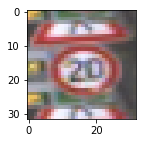

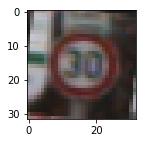

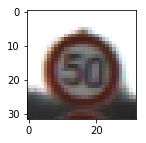

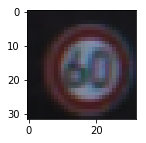

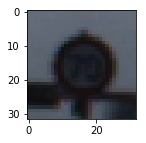

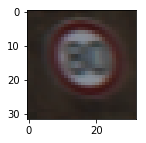

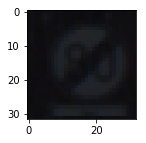

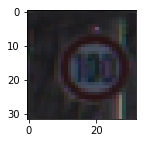

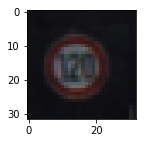

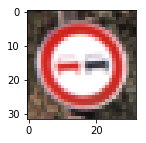

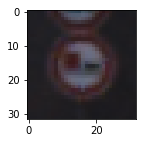

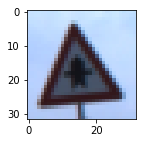

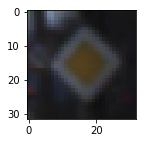

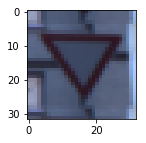

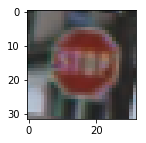

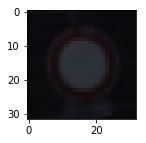

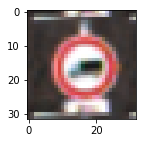

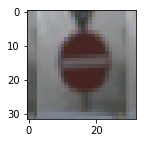

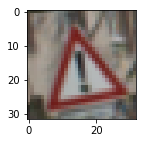

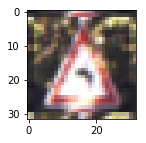

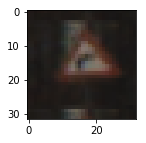

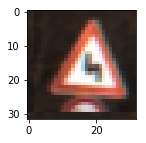

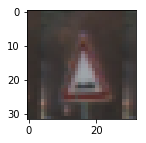

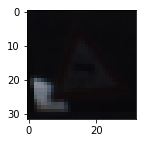

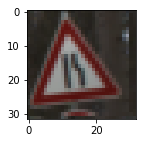

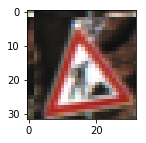

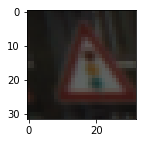

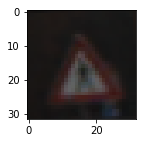

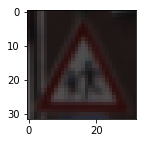

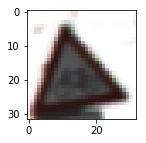

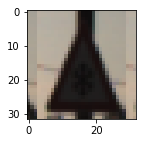

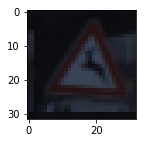

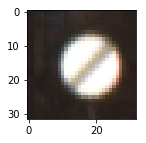

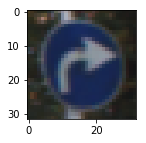

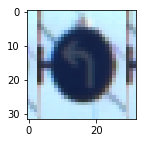

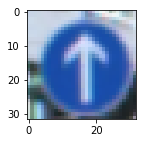

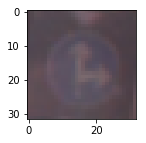

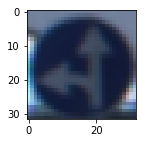

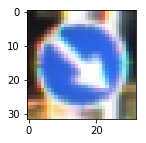

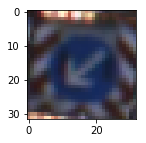

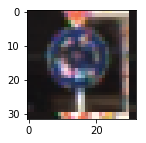

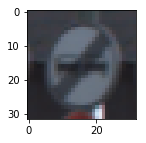

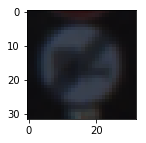

In [21]:
### Data exploration visualization

# Helper function to evaluate csv
def is_int(value):
  try:
    int(value)
    return True
  except:
    return False

# Helper function to read csv
def parse_csv(csv_file_name):
    class_val_name_map = {}
    with open(csv_file_name, newline='') as sign_names:
        sign_names_reader = csv.reader(sign_names, delimiter=',', quotechar='|')
        for row in sign_names_reader:
            if is_int(row[0]):
                class_val_name_map[int(row[0])] = row[1]
    return class_val_name_map

# Helper function to draw input image
def show_image(index):
    image = X_train[index].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    print("Class value of image =", y_train[index], ":", class_val_name_map[y_train[index]])
    
# Bar chart of input distribution
plt.figure(1)
plt.bar(unique_classes, class_counts, align='center', alpha=0.5)
plt.xlabel('Class label')
plt.ylabel('Nbr occurances')
plt.title('Class label occurance in test set')
plt.savefig('plots/class_label_occurance.png')
plt.close(1)

# Read csv
class_val_name_map = parse_csv('signnames.csv')

# Load random picture and output its class
for class_label in range(len(unique_classes)):
    class_indices = np.where(y_train == unique_classes[class_label])[0]
    print(class_indices)
    if class_indices.shape[0] > 0:
        image_index = class_indices[ random.randint(0, class_indices.shape[0]) ]
        show_image(image_index)

print("Minimum occurance count of class ", class_val_name_map[np.argmin(class_counts)], "=", min(class_counts))
print("Maximum occurance count of class ", class_val_name_map[np.argmax(class_counts)], "=", max(class_counts))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Augmentation of the data

# Minimum allowed class count after augmentation
MIN_AUG_CLASS_COUNT = 1500

# Augmentation methods
def rotate_right(image):
    angle = random.randint(4, 8)
    image = imgtf.rotate(image, angle, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def rotate_left(image):
    angle = -random.randint(4, 8)
    image = imgtf.rotate(image, angle, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def scale_up(image):
    factor = random.uniform(0.8, 0.9)
    c = (image.shape[0] / 2 * (1 - factor), image.shape[1] / 2 * (1 - factor))
    transform = imgtf.AffineTransform(scale=(factor, factor), translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def scale_down(image):
    factor = random.uniform(1.1, 1.2)
    c = (image.shape[0] / 2 * (1 - factor), image.shape[1] / 2 * (1 - factor))
    transform = imgtf.AffineTransform(scale=(factor, factor), translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def bulge_horizontal(image):
    factor = random.uniform(1.2, 1.3)
    c = (image.shape[0] / 2 * (1 - factor), 0)
    transform = imgtf.AffineTransform(scale=(factor, 1.0), translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def bulge_vertical(image):
    factor = random.uniform(1.2, 1.3)
    c = (0, image.shape[0] / 2 * (1 - factor))
    transform = imgtf.AffineTransform(scale=(1.0, factor), translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def move_right(image):
    offset_x = 2
    offset_y = random.randint(-2, 2)
    transform = imgtf.AffineTransform(translation=(offset_x, offset_y))
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def move_left(image):
    offset_x = -2
    offset_y = random.randint(-2, 2)
    transform = imgtf.AffineTransform(translation=(offset_x, offset_y))
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def shear_right(image):
    angle = random.uniform(0.1, 0.2)
    c = (4 * angle, 2)
    transform = imgtf.AffineTransform(shear=angle, translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

def shear_left(image):
    angle = -random.uniform(0.1, 0.2)
    c = (4 * angle, 2)
    transform = imgtf.AffineTransform(shear=angle, translation=c)
    image = imgtf.warp(image, transform, mode='wrap', preserve_range=True)
    return np.clip(image, 0, 255).astype(np.uint8)

aug_operations = {
    0: rotate_right,
    1: rotate_left,
    2: scale_up,
    3: scale_down,
    4: bulge_horizontal,
    5: bulge_vertical,
    6: move_right,
    7: move_left,
    8: shear_right,
    9: shear_left}

# Calculate how many copies of each image need to be made during augmentation
class_aug_multiplier = np.zeros([n_classes], dtype=np.int)
for i in range(n_classes):
    class_aug_multiplier[i] = MIN_AUG_CLASS_COUNT // class_counts[i]
    if (MIN_AUG_CLASS_COUNT % class_counts[i] != 0):
        class_aug_multiplier[i] += 1
print("Augmentation factors:", class_aug_multiplier)
print()

# Do the augmentation
print("Augmenting...")
x_aug = []
y_aug = []
for i in range(len(X_train)):
    aug_ops = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], class_aug_multiplier[y_train[i]])
    for op in aug_ops:
        x_aug.append(aug_operations[op](X_train[i]))
        y_aug.append(y_train[i])
print("...Done")
print()

# Add augmented images to training set
x_aug = np.array(x_aug)
y_aug = np.array(y_aug)
X_train = np.concatenate((X_train, x_aug))
y_train = np.concatenate((y_train, y_aug))

# Size of augmented training set
n_train = len(X_train)
print("Size of augmented training set:", n_train)
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Minimum occurance count of class ", class_val_name_map[np.argmin(class_counts)], "=", min(class_counts))
print("Maximum occurance count of class ", class_val_name_map[np.argmax(class_counts)], "=", max(class_counts))

Augmentation factors: [9 1 1 2 1 1 5 2 2 2 1 2 1 1 3 3 5 2 2 9 5 6 5 4 7 2 3 8 4 7 4 3 8 3 5 2 5
 9 1 6 5 8 8]

Augmenting...
...Done

Size of augmented training set: 115616
Minimum occurance count of class  Speed limit (20km/h) = 1800
Maximum occurance count of class  Road work = 4050


In [6]:
### Preprocessing of the data
    
# Transform RGB to YUV
def to_YUV(x_data):
    T = np.array([[ 0.299,    0.587,    0.114],
                  [-0.14713, -0.28886,  0.436],
                  [ 0.615,   -0.51499, -0.10001]])
    x_data = np.dot(x_data, np.transpose(T))
    return x_data

def to_Y_of_YUV(x_data):
    T = np.array([0.299, 0.587, 0.114])
    x_grayscale = np.dot(x_data, np.transpose(T))
    return np.expand_dims(x_grayscale, axis=4)

# Define a preprocessing function
def preprocess_data(x_data):
    x_data = to_Y_of_YUV(x_data)
    x_data = ((x_data - 128) / 128)
    #for i in range(x_data.shape[0]):
    #    for j in range(x_data.shape[3]):
    #        x_min = np.min(x_data[i][:,:,j:j+1])
    #        x_max = np.max(x_data[i][:,:,j:j+1])
    #        x_data[i][:,:,j:j+1] = (((x_data[i][:,:,j:j+1] - x_min) / (x_max - x_min)) - 0.5)
    return x_data

# Preprocess all data
X_train_pro = preprocess_data(X_train)
X_train_pro = preprocess_data(X_train)
y_train_pro = y_train
X_valid_pro = preprocess_data(X_valid)
y_valid_pro = y_valid
X_test_pro  = preprocess_data(X_test)
y_test_pro  = y_test

# Output the number of color channels
nbr_color_channels = X_train_pro.shape[3]
print("Number of color channels:", nbr_color_channels)

Number of color channels: 1


### Model Architecture

In [7]:
### Definitinon of convolutional network architecture.

# Parametrization of Convolutional Network
mu = 0
sigma = 0.1
dropout_keep_prob = tf.placeholder(tf.float32)

# Layer 1: Convolutional. Input 32x32xnbr_color_channels. Output 29x29x12
conv1_W = tf.Variable(tf.truncated_normal((4, 4, nbr_color_channels, 12), mu, sigma))
conv1_b = tf.Variable(tf.zeros(12))

# Layer 2: Convolutional. Input = 29x29x12. Output = 28x28x18.
conv2_W = tf.Variable(tf.truncated_normal((2, 2, 12, 18), mu, sigma))
conv2_b = tf.Variable(tf.zeros(18))
    
# Layer 3: Convolutional. Input = 14x14x18. Output = 6x6x25.
conv3_W = tf.Variable(tf.truncated_normal((4, 4, 18, 25), mu, sigma))
conv3_b = tf.Variable(tf.zeros(25))

# Layer 4: Fully Connected. Input = 900. Output = 300.
full4_W = tf.Variable(tf.truncated_normal((900, 300), mu, sigma))
full4_b = tf.Variable(tf.zeros(300))
    
# Layer 5: Fully Connected. Input = 300. Output = 150.
full5_W = tf.Variable(tf.truncated_normal((300, 150), mu, sigma))
full5_b = tf.Variable(tf.zeros(150))
    
# Layer 6: Fully Connected. Input = 150. Output = n_classes.
full6_W = tf.Variable(tf.truncated_normal((150, n_classes), mu, sigma))
full6_b = tf.Variable(tf.zeros(n_classes))
    
def ConvNet(x):

    # Layer 1: Convolutional. Input 32x32xnbr_color_channels. Output 29x29x12
    conv1 = tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID') + conv1_b

    # Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Layer 1: Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=dropout_keep_prob)

    # Layer 2: Convolutional. Input = 29x29x12. Output = 28x28x18.
    conv2 = tf.nn.conv2d(conv1, conv2_W, [1, 1, 1, 1], 'VALID') + conv2_b

    # Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 28x28x18. Output = 14x14x18.
    conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # Layer 3: Convolutional. Input = 14x14x18. Output = 6x6x25
    conv3 = tf.nn.conv2d(conv2, conv3_W, [1, 2, 2, 1], 'VALID') + conv3_b
    
    # Layer 3: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Layer 3: Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob=dropout_keep_prob)

    # Layer 3 -> Layer 4: Flatten the data
    conv3_flat = flatten(conv3)

    # Layer 4: Fully Connected. Input = 900. Output = 300.
    full4 = tf.matmul(conv3_flat, full4_W) + full4_b

    # Layer 4: Activation
    full4 = tf.nn.relu(full4)

    # Layer 5: Fully Connected. Input = 300. Output = 150.
    full5 = tf.matmul(full4, full5_W) + full5_b

    # Layer 5: Activation
    full5 = tf.nn.relu(full5)

    # Layer 5: Dropout
    full5 = tf.nn.dropout(full5, keep_prob=dropout_keep_prob)

    # Layer 6: Fully Connected. Input = 150. Output = n_classes.
    full6 = tf.matmul(full5, full6_W) + full6_b

    return full6

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Model is trained here.
### Accuracy on the training and validation set are calculated and reported.
### TODO: Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

# Define training size and duration
EPOCHS = 15
BATCH_SIZE = 128

# Define placeholder nodes for input and output
x = tf.placeholder(tf.float32, (None, 32, 32, nbr_color_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Define learning rate
rate = 0.001

# Define training pipeline
logits = ConvNet(x)
model_prediction   = tf.argmax(logits, 1)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

# Define evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Prepare to save/restore the session
saver = tf.train.Saver()

# Define helper method to calculate accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_X = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_X, y: batch_y, dropout_keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_X))
    return total_accuracy / num_examples

# Now run everything...
with tf.Session() as sess:
    # some preparation
    sess.run(tf.global_variables_initializer())
    training_size   = len(X_train_pro)
    validation_size = len(X_valid_pro)
    print("Training...")
    print()
    
    # run training loop
    for i in range(EPOCHS):
        X_train_pro, y_train_pro = shuffle(X_train_pro, y_train_pro)
        for offset in range(0, training_size, BATCH_SIZE):
            batch_X = X_train_pro[offset:offset+BATCH_SIZE]
            batch_y = y_train_pro[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={x: batch_X, y: batch_y, dropout_keep_prob: 0.5})
        print("  EPOCH {} ...".format(i+1))
        print("  Training   Accuracy = {:.3f}".format(evaluate(X_train_pro, y_train_pro)))
        print("  Validation Accuracy = {:.3f}".format(evaluate(X_valid_pro, y_valid_pro)))
        print()
    saver.save(sess, './convnet')
    print("...Saved and done")
    print()
    
    # run additional evaluation on predictions
    print("Evaluating...")
    print()
    prediction_matrix = np.zeros([n_classes, n_classes], dtype=np.int) # counts occurances of [correct_class, matched_class]
    for i in range(validation_size):
        batch_X = X_valid_pro[i:i+1]
        batch_y = y_valid_pro[i:i+1]
        prediction_value = sess.run(model_prediction, feed_dict={x: batch_X, y: batch_y, dropout_keep_prob: 1.0})
        if (y_valid_pro[i] < n_classes) & (prediction_value < n_classes):
            prediction_matrix[y_valid_pro[i], prediction_value] += 1
    
    # output additional evaluation on predictions
    valid_unique_classes, valid_class_counts = np.unique(y_valid_pro, return_counts=True)
    for i in range(n_classes):
        print(i, class_val_name_map[i], ":", prediction_matrix[i][i], "of", valid_class_counts[i])
        for j in range(n_classes):
            if (i != j) & (prediction_matrix[i][j] / valid_class_counts[i] > 0.005):
                print("   erroneously matched to", class_val_name_map[j], "with probability {:.3f}".format(prediction_matrix[i][j] / valid_class_counts[i]))
        

Training...

  EPOCH 1 ...
  Training   Accuracy = 0.806
  Validation Accuracy = 0.838

  EPOCH 2 ...
  Training   Accuracy = 0.912
  Validation Accuracy = 0.917

  EPOCH 3 ...
  Training   Accuracy = 0.943
  Validation Accuracy = 0.934

  EPOCH 4 ...
  Training   Accuracy = 0.965
  Validation Accuracy = 0.952

  EPOCH 5 ...
  Training   Accuracy = 0.976
  Validation Accuracy = 0.955

  EPOCH 6 ...
  Training   Accuracy = 0.981
  Validation Accuracy = 0.952

  EPOCH 7 ...
  Training   Accuracy = 0.983
  Validation Accuracy = 0.958

  EPOCH 8 ...
  Training   Accuracy = 0.987
  Validation Accuracy = 0.961

  EPOCH 9 ...
  Training   Accuracy = 0.986
  Validation Accuracy = 0.951

  EPOCH 10 ...
  Training   Accuracy = 0.990
  Validation Accuracy = 0.964

  EPOCH 11 ...
  Training   Accuracy = 0.991
  Validation Accuracy = 0.961

  EPOCH 12 ...
  Training   Accuracy = 0.993
  Validation Accuracy = 0.969

  EPOCH 13 ...
  Training   Accuracy = 0.993
  Validation Accuracy = 0.966

  EPOCH 

In [9]:
### Runs and outputs the validation on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("  Test Accuracy = {:.3f}".format(evaluate(X_test_pro, y_test_pro)))

  Test Accuracy = 0.961


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

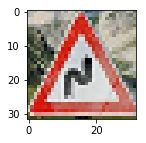

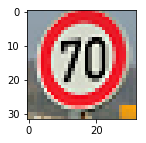

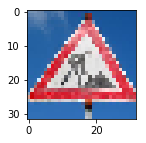

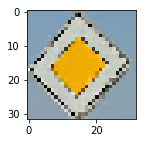

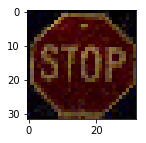

In [10]:
### Load and plot some images from the internet.

# Helper function to return RGB-pixel values of an image
def load_image_data(image_file_name):
    im = Image.open(image_file_name, 'r')
    width, height = im.size
    pixel_values = list(im.getdata())
    pixel_values = np.array(pixel_values).reshape((width, height, 3))
    return pixel_values.astype(dtype='uint8')

# Load the images
x_curve = load_image_data('examples/example_double-curve_32x32.png')
plt.figure(figsize=(2,2))
plt.imshow(x_curve)
x_limit70 = load_image_data('examples/example_limit-70_32x32.png')
plt.figure(figsize=(2,2))
plt.imshow(x_limit70)
x_roadworks = load_image_data('examples/example_road-works_32x32.png')
plt.figure(figsize=(2,2))
plt.imshow(x_roadworks)
x_priority = load_image_data('examples/example_priority-road_32x32.png')
plt.figure(figsize=(2,2))
plt.imshow(x_priority)
x_stop = load_image_data('examples/example_stop_32x32.png')
plt.figure(figsize=(2,2))
plt.imshow(x_stop)

# Define the test data
X_mytest = np.array([x_curve, x_limit70, x_roadworks, x_priority, x_stop])
y_mytest = np.array([21,      4,         25,          12,         14])

# Normalize the test data
X_mytest_pro = preprocess_data(X_mytest)
y_mytest_pro = y_mytest

### Predict the Sign Type for Each Image

In [11]:
### Runs and outputs the predictions for each image from the internet.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(len(y_mytest_pro)):
        cur_X = X_mytest_pro[i:i+1]
        cur_y = y_mytest_pro[i:i+1]
        result_label = sess.run(model_prediction, feed_dict={x: cur_X, y: cur_y, dropout_keep_prob: 1.0})
        print("Image", i+1, "got result label: ", class_val_name_map[result_label[0]])      

Image 1 got result label:  Children crossing
Image 2 got result label:  Speed limit (70km/h)
Image 3 got result label:  Road work
Image 4 got result label:  Priority road
Image 5 got result label:  Stop


### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("New Image Accuracy = {:.3f}".format(evaluate(X_mytest_pro, y_mytest_pro)))

New Image Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

model_softmax = tf.nn.softmax(logits)
model_top3    = tf.nn.top_k(model_softmax, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top3_result = sess.run(model_top3, feed_dict={x: X_mytest_pro, y: y_mytest_pro, dropout_keep_prob: 1.0})
    for i in range (len(y_mytest)):
        print("Image", i, "(", class_val_name_map[y_mytest_pro[i]], "):")
        for k in range (5):
            print("   {:.3f}".format(top3_result[0][i][k]), "for label", class_val_name_map[top3_result[1][i][k]], )


Image 0 ( Double curve ):
   0.837 for label Children crossing
   0.085 for label Dangerous curve to the right
   0.053 for label Slippery road
   0.016 for label Road work
   0.008 for label Pedestrians
Image 1 ( Speed limit (70km/h) ):
   0.592 for label Speed limit (70km/h)
   0.203 for label Speed limit (20km/h)
   0.194 for label Speed limit (30km/h)
   0.006 for label Speed limit (50km/h)
   0.003 for label Speed limit (120km/h)
Image 2 ( Road work ):
   1.000 for label Road work
   0.000 for label Slippery road
   0.000 for label Dangerous curve to the right
   0.000 for label Bicycles crossing
   0.000 for label Bumpy road
Image 3 ( Priority road ):
   1.000 for label Priority road
   0.000 for label Roundabout mandatory
   0.000 for label Keep right
   0.000 for label No vehicles
   0.000 for label Speed limit (60km/h)
Image 4 ( Stop ):
   0.997 for label Stop
   0.002 for label Speed limit (50km/h)
   0.000 for label Speed limit (30km/h)
   0.000 for label Keep right
   0.000

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


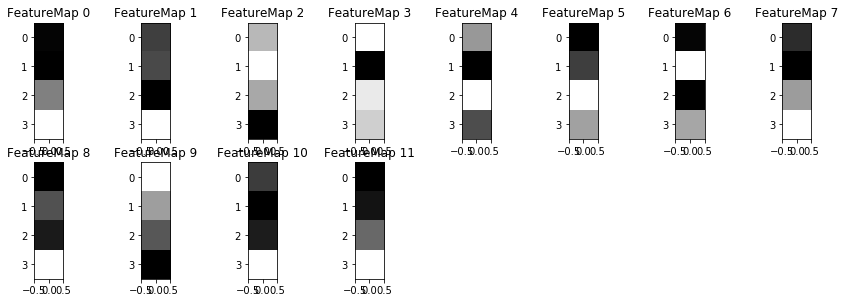

In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        activation = tf_activation.eval(session=sess)
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

outputFeatureMap(X_mytest_pro[0], conv1_W)